### Importing the Dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### importing boston house price dataset


In [3]:
house_price_dataset = sklearn.datasets.fetch_california_housing()
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
# converting into pd dataframe
house_price_dataframe = pd.DataFrame(
    house_price_dataset.data, columns=house_price_dataset.feature_names
)

# Add the target variable (house prices) as 'Price' column
house_price_dataframe["Price"] = house_price_dataset.target

# Display the first few rows with all columns including Price
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# checking the numebr of rows and colliumns in the data frame
house_price_dataframe.shape

(20640, 9)

In [6]:
# check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Understanding the correlation between various feauters in the datset


In [8]:
# Understanding the correlation between various features in the dataset

# Calculate correlation matrix
# Correlation shows how strongly features are related to each other
# Values range from -1 to +1:
# +1 = Perfect positive correlation (when one increases, other increases)
# -1 = Perfect negative correlation (when one increases, other decreases)
# 0 = No correlation
correlation = house_price_dataframe.corr()

# Display correlation with Price (most important for prediction)
print("Correlation with House Price:")
print(correlation['Price'].sort_values(ascending=False))

Correlation with House Price:
Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


<Axes: >

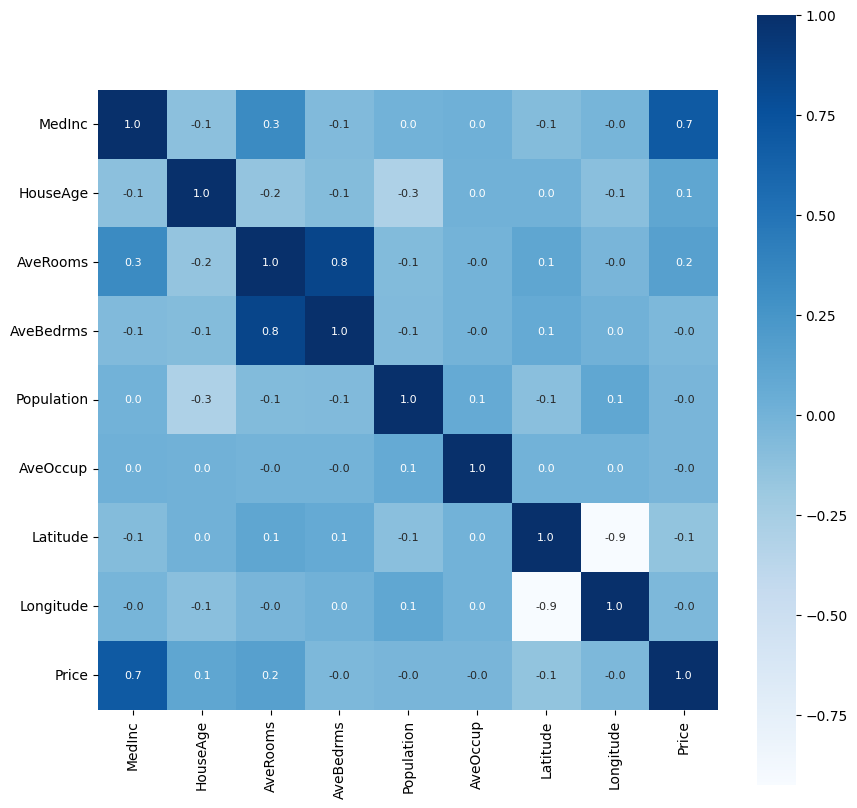

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 8},
    cmap="Blues",
)

### spliting the data

In [10]:
X = house_price_dataframe.drop(["Price"], axis=1)
Y = house_price_dataframe["Price"]
# X, Y

### splitting the data into testing and trainging data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


### Model training

#### XGBoost Regressor

In [13]:
# loading the model
model = XGBRegressor()

In [14]:
# training the model with X_train
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluations

#### Prediction on training data


In [15]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [16]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [17]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [18]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ",score_1)
print("Mean absolute Error : ", score_2)

R squared error :  0.943650140819218
Mean absolute Error :  0.19336487006121048


#### Visualizing the actual prices and predicted prices

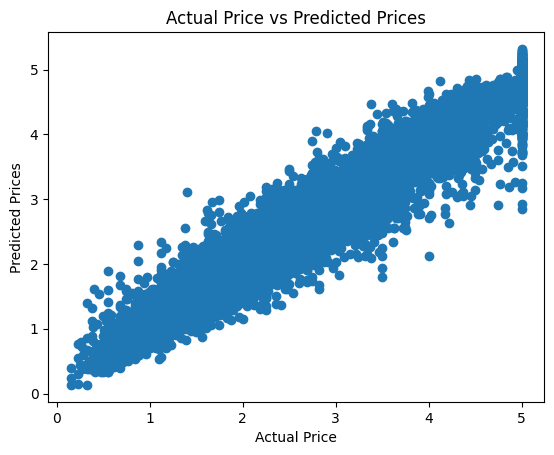

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

#### Prediction on test data


In [20]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean absolute Error : ", score_2)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]
R squared error :  0.8338000331788725
Mean absolute Error :  0.3108631800268186
